*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

# Data Visualization
Data visualization is the process to plot the data into figures and provide the data scientist multiple direct view of the data under analysis. Python provides a useful tool called `matplotlib` for this purpose. Knowing how to use this package will satisfy most of your everyday needs for data visualization.



# Visualization with Matplotlib

It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``:

In [3]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

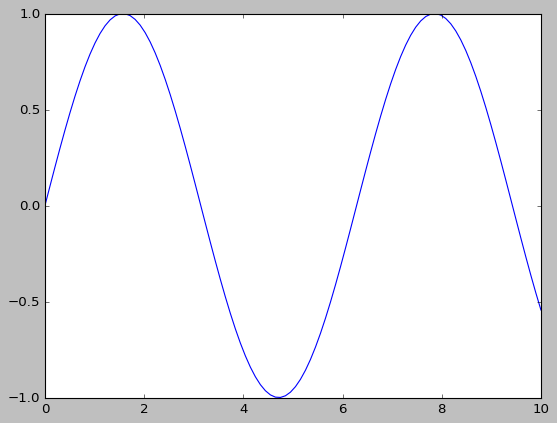

In [7]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.style.use('classic') #set plot style to 'classic'
plt.plot(x, np.sin(x), '-')

<p style="color:red;font-size:30px">Your turn 1</p>

Use `plt.plot(x, np.cos(x), '--')` to plot cos function using same setting as the above example.

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [5]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [6]:
!ls -lh my_figure.png

-rw-r--r--  1 jakevdp  staff    16K Aug 11 10:59 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

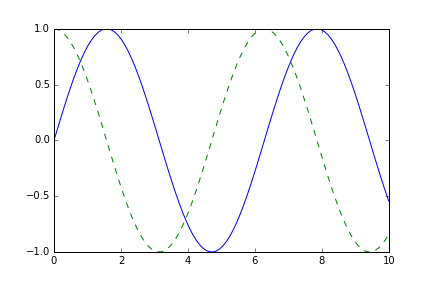

In [7]:
from IPython.display import Image
Image('my_figure.png')

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

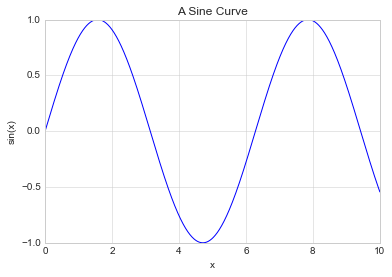

In [14]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

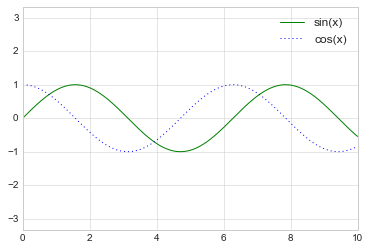

In [15]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring; additionally, we will cover some more advanced legend options in [Customizing Plot Legends](04.06-Customizing-Legends.ipynb).

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

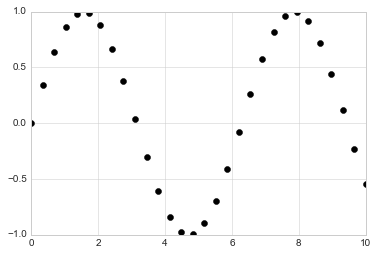

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

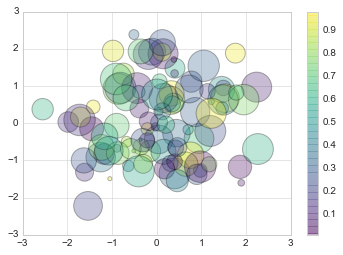

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

<p style="color:red;font-size:30px">Your turn 2</p>

Scatter plot `cos` function using same setting as the above example.  
Hint: use `np.cos`

# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (see [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boiler-plate imports are done:

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

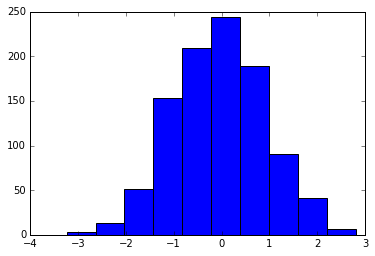

In [8]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

<p style="color:red;font-size:30px">Your turn 3</p>

Plot the histogram for the `data = np.random.normal(0, 0.8, 1000)`.

# Seaborn package
[Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types.

Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

To install seaborn package inside jupyter notebook use the following command.

In [ ]:
!pip3 install seaborn

To load seaborn package just use `import` command. By convention, Seaborn is imported as ``sns``. 

In [19]:
import seaborn as sns

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


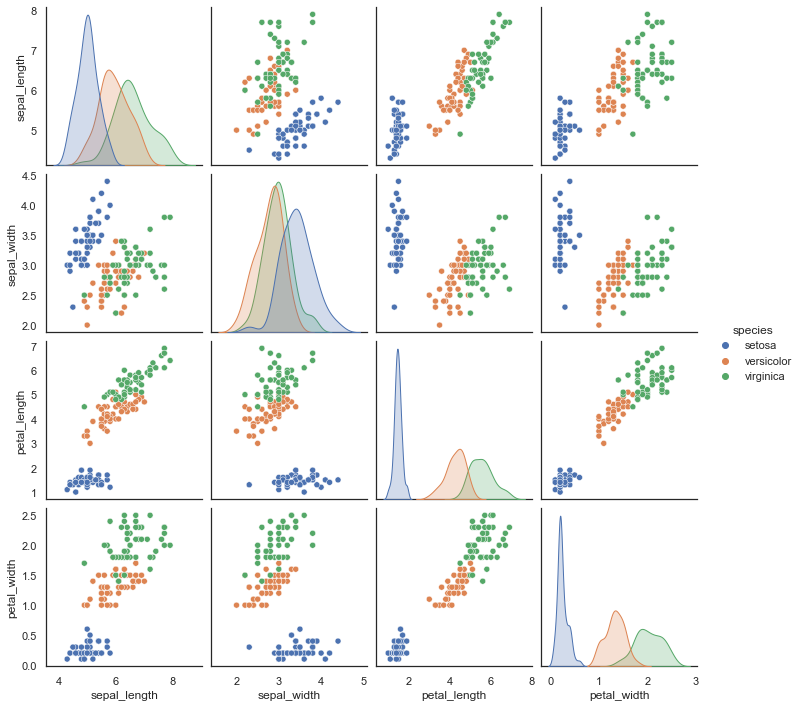

In [21]:
sns.pairplot(iris, hue='species', size=2.5);